# ΔΙΚΤΥΑΚΗ ΑΝΑΛΥΣΗ ΤΟΥ ΑΜΛΕΤ ΤΟΥ ΣΑΙΞΠΗΡ

In [1]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt

Το αρχείο κειμένου για τον Άμλετ του Σαίξπηρ ('ShakespeareHamletOrig_from_PG.txt') τροποποιήθηκε ώστε όλα τα ονόματα των χαρακτήρων ("actors") του έργου να αναφέρονται με κοινά ονόματα. Το τροποποιημένο αρχείο  ('corpora/HamletShakespeare.txt') είναι αυτό που επεξεργαζόμαστε εδώ.

In [2]:
fileName = 'corpora/HamletShakespeare.txt'
f=open(fileName,'r')
f.seek(765)
hamlet=f.read(290)
print hamlet

Hamlet, Prince of Denmark

by William Shakespeare [Collins edition]

November, 1998 [Etext #1524]
Most recently updated: January 26, 2009


Project Gutenberg Etext of Hamlet by Shakespeare
******This file should be named 1524.txt or 1524.zip******

This etext was prepared by Dianne Bean.




In [3]:
f.seek(0)
for i in range(324):
    if i < 286:
        chars=f.readline()
    else:
        print f.readline()        

HAMLET, PRINCE OF DENMARK



by William Shakespeare





Claudius, King of Denmark.

Hamlet, Son to the former, and Nephew to the present King

Polonius, Lord Chamberlain.

Horatio, Friend to Hamlet.

Laertes, Son to Polonius.

Voltimand, Courtier.

Cornelius, Courtier.

Rosencrantz, Courtier.

Guildenstern, Courtier.

Osric, Courtier.

A Gentleman, Courtier.

A Priest

Marcellus, Officer.

Bernardo, Officer.

Francisco, a Soldier

Reynaldo, Servant to Polonius.

Players

Two Clowns

Grave-diggers

Fortinbras, Prince of Norway.

A Captain.

English Ambassadors.

Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.

Ophelia, Daughter to Polonius.



Lords

Ladies

Officers

Soldiers

Sailors

Messengers, and other Attendants.





In [4]:
%autoreload 2
from testy import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

act_dict,u,pers_l,pers_dict,pact,lact=create_dict_of_acts(fileName)

print 'Actors appearing in Hamlet:'  
for actor in pers_l:
    print actor
print
print 'The number of actors in Hamlet is', len(pers_l)

Actors appearing in Hamlet:
King
Hamlet
Polonius
Horatio
Laertes
Voltimand
Cornelius
Rosencrantz
Guildenstern
Osric
Gentleman
1 Priest
Marcellus
Bernardo
Francisco
Reynaldo
1 Clown
2 Clown
Fortinbras
Captain
Ghost
Queen
Ophelia
Sailor
Messenger

The number of actors in Hamlet is 25


Ως "διαλογική σχέση" ("conversational relationship") μεταξύ δυο χαρακτήρων (actors) ορίζουμε την εμφάνιση των δυο χαρακτήρων σε ένα (κοινό) διάλογο. Οι μονάδες ή τα "κομμάτια" διαλόγου (conversational chunks) παρουσιάζονται στο κείμενο ως γραμμές κειμένου που περιέχονται μεταξύ δυο κενών γραμμών.

In [5]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum=create_graph_dict(act_dict,pers_l,pers_dict,u)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0
for k,v in graph_dic.items():
    print nx.info(v)
    conver_rel += len(v.edges())
    print
    
print 'Actors appearing in Hamlet in all conversational relationships in all Acts:'  
for i in pernode_dict:
    print i
print
print 'The total number of actors appearing in Hamlet in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 'The total number of conversational relationships (edges) appearing in all Acts of Hamlet is', conver_rel

Name: Act I
Type: Graph
Number of nodes: 24
Number of edges: 23
Average degree:   1.9167

Name: Act II
Type: Graph
Number of nodes: 24
Number of edges: 15
Average degree:   1.2500

Name: Act IV
Type: Graph
Number of nodes: 24
Number of edges: 18
Average degree:   1.5000

Name: Act III
Type: Graph
Number of nodes: 24
Number of edges: 10
Average degree:   0.8333

Name: Act V
Type: Graph
Number of nodes: 24
Number of edges: 17
Average degree:   1.4167

Actors appearing in Hamlet in all conversational relationships in all Acts:
Laertes
Gentleman
Messenger
Marcellus
1 Priest
Francisco
Bernardo
Ophelia
1 Clown
Voltimand
Polonius
Ghost
King
Horatio
Fortinbras
Reynaldo
Osric
Guildenstern
Rosencrantz
Queen
Hamlet
Sailor
2 Clown
Captain

The total number of actors appearing in Hamlet in all conversational relationships in all Acts is 24
The total number of conversational relationships (edges) appearing in all Acts of Hamlet is 83


The number of actors in Hamlet's Act I is 24
The number of conversational relationships in Hamlet's Act I is 23


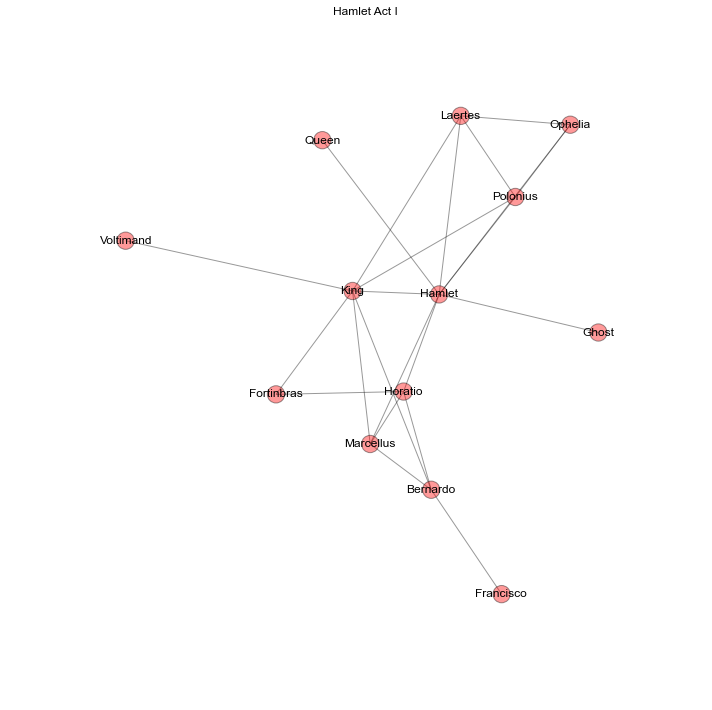

In [6]:
GI = graph_dic[ract_dic[cnum[0]]]
print "The number of actors in Hamlet's Act I is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act I is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
# print weights
# print GI.nodes()
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI)
nx.draw_networkx(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels)
# nx.draw_networkx_labels(GI,pos=pos,labels=weights)
plt.title("Hamlet Act I")
kk=plt.axis('off')

The number of actors in Hamlet's Act II is 24
The number of conversational relationships in Hamlet's Act II is 15


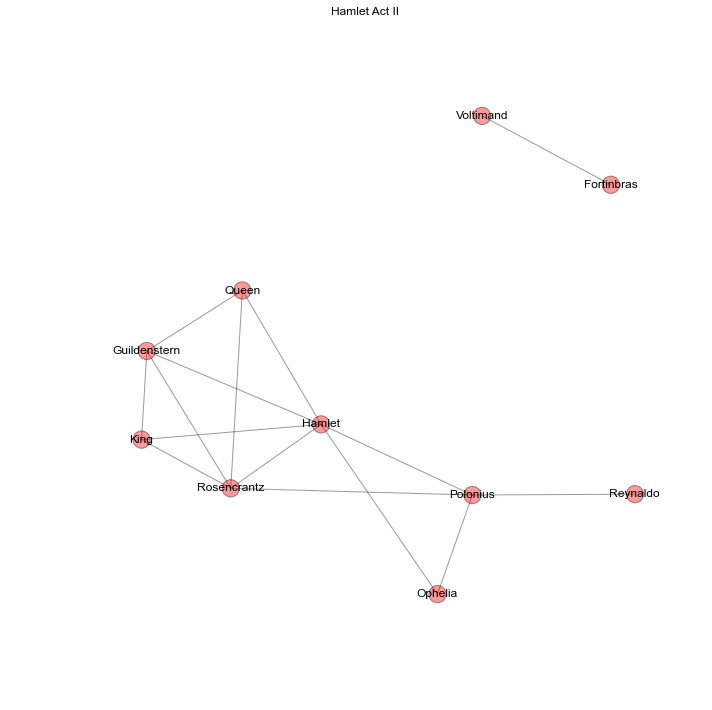

In [7]:
GI = graph_dic[ract_dic[cnum[1]]]
print "The number of actors in Hamlet's Act II is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act II is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
# print weights
# print GI.nodes()
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI)
nx.draw_networkx(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels)
# nx.draw_networkx_labels(GI,pos=pos,labels=weights)
plt.title("Hamlet Act II")
kk=plt.axis('off')

The number of actors in Hamlet's Act III is 24
The number of conversational relationships in Hamlet's Act III is 10


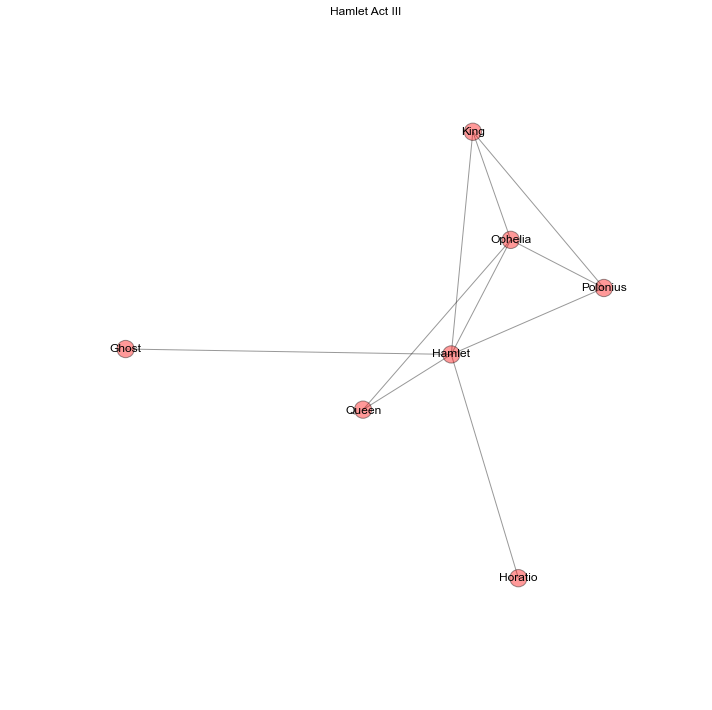

In [8]:
GI = graph_dic[ract_dic[cnum[2]]]
print "The number of actors in Hamlet's Act III is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act III is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
# print weights
# print GI.nodes()
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI)
nx.draw_networkx(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels)
# nx.draw_networkx_labels(GI,pos=pos,labels=weights)
plt.title("Hamlet Act III")
kk=plt.axis('off')

The number of actors in Hamlet's Act IV is 24
The number of conversational relationships in Hamlet's Act IV is 18


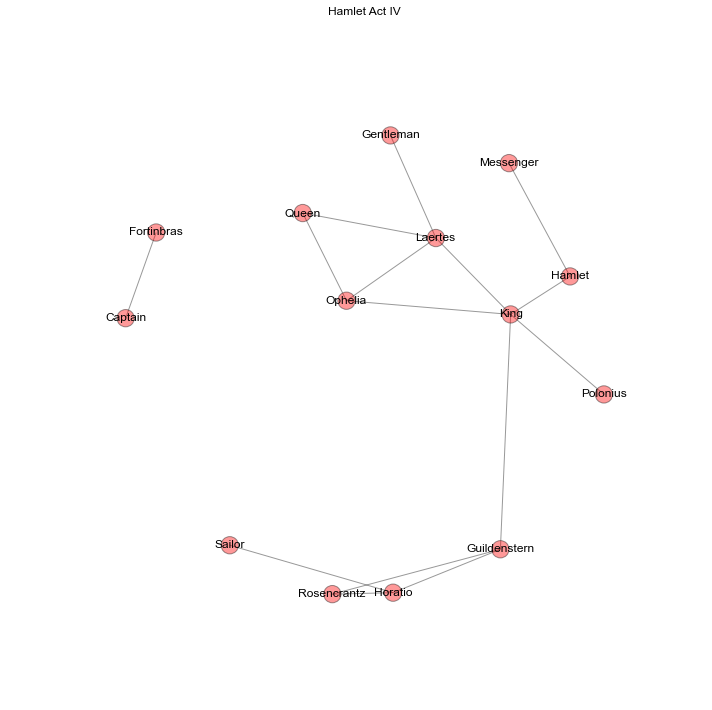

In [9]:
GI = graph_dic[ract_dic[cnum[3]]]
print "The number of actors in Hamlet's Act IV is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act IV is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
# print weights
# print GI.nodes()
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI)
nx.draw_networkx(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels)
# nx.draw_networkx_labels(GI,pos=pos,labels=weights)
plt.title("Hamlet Act IV")
kk=plt.axis('off')

The number of actors in Hamlet's Act V is 24
The number of conversational relationships in Hamlet's Act V is 17


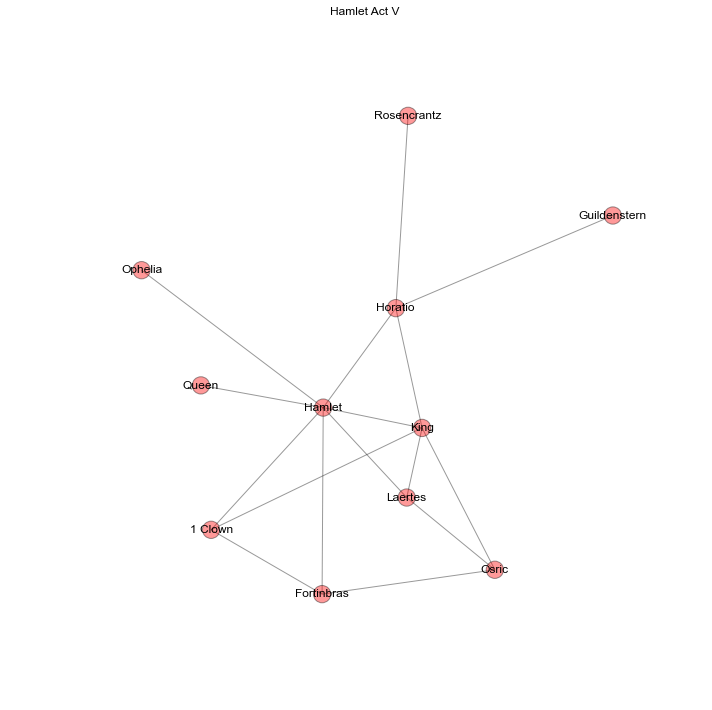

In [10]:
GI = graph_dic[ract_dic[cnum[4]]]
print "The number of actors in Hamlet's Act V is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act V is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
# print weights
# print GI.nodes()
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI)
nx.draw_networkx(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels)
# nx.draw_networkx_labels(GI,pos=pos,labels=weights)
plt.title("Hamlet Act V")
kk=plt.axis('off')

The number of actors in Hamlet Network (all Acts) is 22
The number of conversational relationships in Hamlet Network (all Acts) is 52


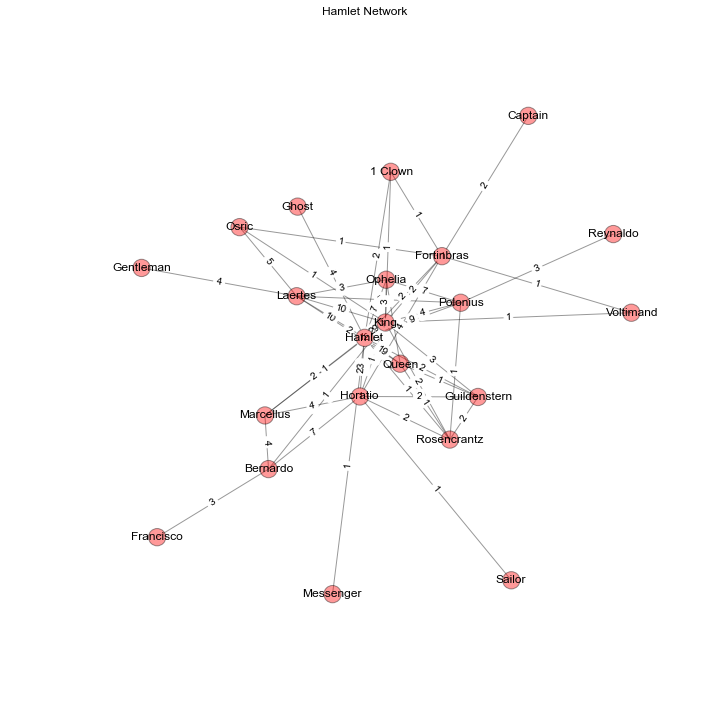

In [36]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
print "The number of actors in Hamlet Network (all Acts) is", len(G.nodes())
print "The number of conversational relationships in Hamlet Network (all Acts) is", len(G.edges())

# print labels
plt.figure(figsize=(12,12))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels)
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=weights)
plt.title("Hamlet Network")
kk=plt.axis('off')

In [37]:
# G=nx.Graph()
# for k,v in graph_dic.items():
#     for ed in v.edges(data=True):
#         ww=ed[2]['weight']
#         if G.has_edge(ed[0],ed[1]):
#             wei=G[ed[0]][ed[1]]['weight']
#         else:
#             wei=0
#         G.add_edge(ed[0],ed[1],weight=wei+ww)
#     G.add_nodes_from(v.nodes())

# # GI = graph_dic[ract_dic[cnum[3]]]
# print "The number of actors in Hamlet Network (all Acts) is", len(G.nodes())
# print "The number of conversational relationships in Hamlet Network (all Acts) is", len(G.edges())

# G.remove_nodes_from(nx.isolates(G))
# labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}

# plt.figure(figsize=(12,12))
# pos=nx.spring_layout(G)
# nx.draw_networkx(G,pos=pos,with_labels=False,alpha=0.4)
# labe=nx.draw_networkx_labels(G,pos=pos,labels=labels)
# # # nx.draw_networkx_labels(GI,pos=pos,labels=weights)
# plt.title("Hamlet Network")
# kk=plt.axis('off')